# Test Case Generator
Generate sequence of test points within the specs of the motor.

## Space for the test parameters

In [150]:
P_max = 100  # in kW
P_min = 0  # in kW
n_max = 20000  # in rpm
n_min = 0  # in rpm
T_max_con = 140  # in Nm
T_max_peak = 220  # in Nm
t_max = 120  # in min

## Generate sequence of setpoints

In [151]:
import numpy as np
import pandas as pd
import numpy as np

num_points = 72 # number of points to be generated

np.random.seed(0)
P = np.random.randint(P_min, P_max, num_points)
n = np.random.randint(n_min, n_max, num_points)
T = np.random.randint(0, T_max_con, num_points)

T = np.array([P[i] * 60 / (2 * np.pi * n[i]) * 1e3 for i in range(num_points)])
T = np.clip(T, None, T_max_con)                                                   # clip the values to the maximum torque
P = np.array([2 * np.pi * n[i] * T[i] / 60 / 1e3 for i in range(num_points)])       # recalculate the power values after clipping     
t = np.random.randint(0, t_max, num_points)

df = pd.DataFrame({'Power in kW': P, 'n in rpm': n, 'Torque in Nm': T, 't in minutes': t})
df = df[(df['n in rpm'] < 14000) | (df['n in rpm'] > 17500)]                                    # filter out the values in the forbidden range due to vibrations

# # Append rows with RPM higher than 17500 at the end
# df_high_rpm = df[df['n in rpm'] > 19000]
# df = df[df['n in rpm'] <= 19000]
# df = pd.concat([df, df_high_rpm])

# # Reset the index of the DataFrame
# df.reset_index(drop=True, inplace=True)

df.to_excel('setpoints.xlsx', index=False)

t_sum = np.sum(t)
print("Sum over t:", t_sum)
print("Runtime in hours:", t_sum/60)


Sum over t: 3962
Runtime in hours: 66.03333333333333


## Plot the sequence of setpoints

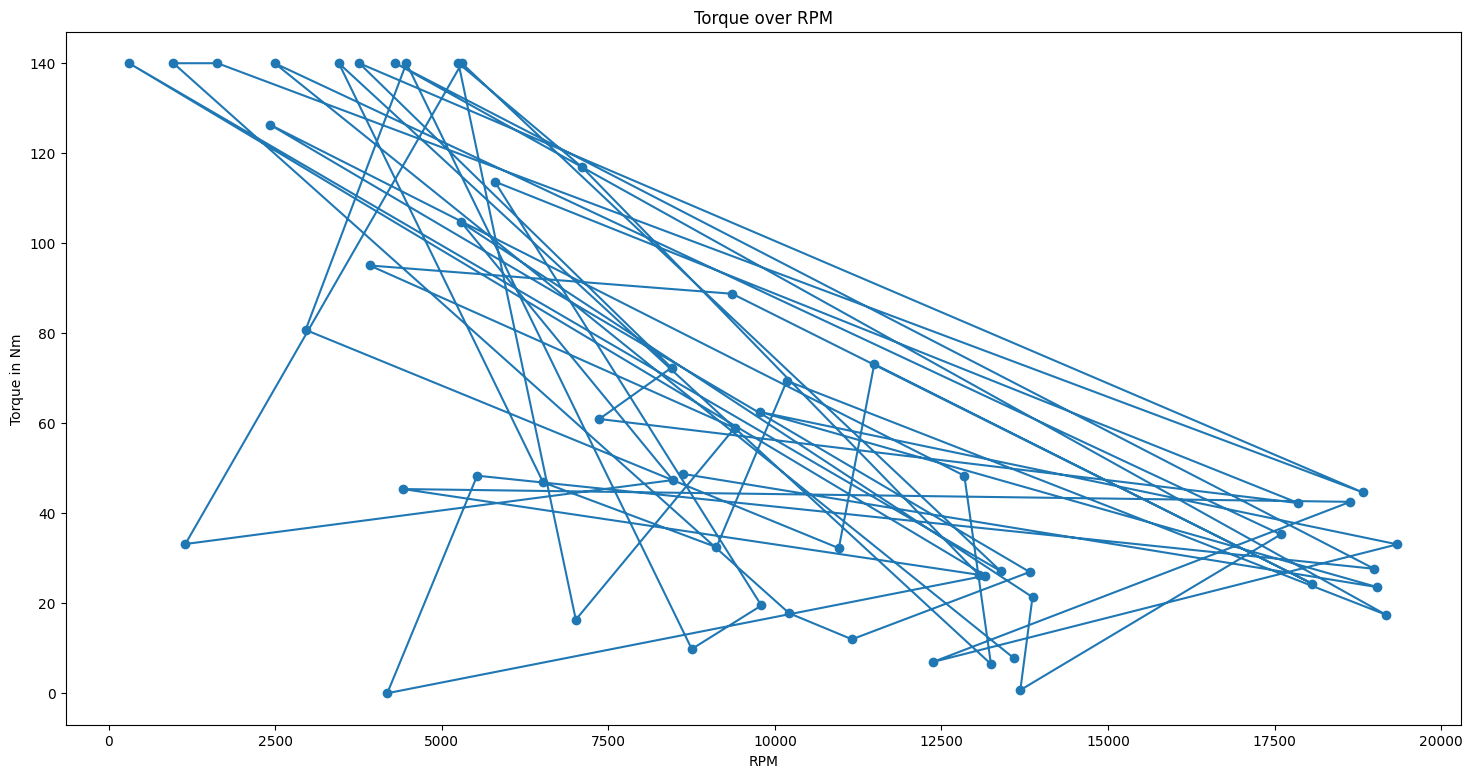

In [152]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 9))

plt.plot(df['n in rpm'], df['Torque in Nm'], 'o-')
plt.xlabel('RPM')
plt.ylabel('Torque in Nm')
plt.title('Torque over RPM')
plt.show()

